# 지도학습

지도 학습 알고리즘은 예를 통해 학습하도록 설계된다. 인간인 관여자가 문제에 대한 답을 알고 있고, 
<br>인공지능(AI)이 그것을 알아낼 수 있도록 훈련시키고자 할 때 사용한다.
<br>지도 학습 알고리즘을 훈련하려면 입력 세트를 특정 출력과 쌍으로 구성해야 한다. 
<br>그러면 알고리즘은 입력 세트 내의 패턴을 검색하여 출력과 상관 관계를 짓는다. 이 훈련 데이터를 기반으로 지도 학습 알고리즘은 보이지 않는 입력을 가져와 지정할 레이블(예측값)을 결정할 수 있다. 
<br>지도 학습 알고리즘의 목표는 새롭게 투입된 입력 데이터에 적합한 레이블을 예측하여 제대로 분류하고 이해하는 것이다.

지도학습은 연속의 유무에 따라 회귀와 분류의 문제로 나눠진다. <br>회귀는 입력에 대해 연속적인 값을 대응시키는 문제이다. 분류는 입력에 대해 순서가 없는 class(비연속적인)라벨을 대응 시키는 문제이다. 

연속적인 데이터를 분석하는데 사용이 되며, 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다.
<br>회귀 분석은 둘 이상의 변수 간의 관계를 보여주는 통계적 방법이다.
<br>회귀(영어: regress)의 원래 의미는 옛날 상태로 돌아가는 것을 의미한다. 영국의 유전학자 프랜시스 골턴은 부모의 키와 아이들의 키 사이의 연관 관계를 연구하면서 부모와 자녀의 키사이에는 선형적인 관계가 있고 키가 커지거나 작아지는 것보다는 전체 키 평균으로 돌아가려는 경향이 있다는 가설을 세웠으며 이를 분석하는 방법을 "회귀분석"이라고 하였다.

# 1차원 입력 직선 모델

16인분의 나이와 키가 세트로 된 데이터를 받아서 키와 나이의 상관관계를 추론하기

In [1]:
#데이터 생성 나이와 키로 된 데이터 생성 X가 나이, T가 키이다.
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed=1)#랜덤 시드 생성
X_min=4
X_max=30
X_n=16# 16개의 데이터를 생성
X=5+25*np.random.rand(X_n) #16개의 랜덤 변수 생성

Prm_c=[170, 108, 0.2]
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.randn(X_n)#170에서 108*랜덤으로 키를 빼기, \로 줄을 바꿔서 입력가능
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)
#생성한 변수를 저장




In [2]:
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [3]:
print(np.round(X, 2))#2의 자리수까지 빼고 나머지는 반올림

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [4]:
print(np.round(T,2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


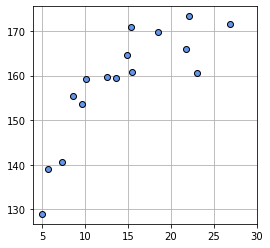

In [5]:
#키와 나이를 이용하여 그래프를 그리기
plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle='None', 
        markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

완벽하지는 않지만 여기서 어느정도 직선을 그어봄으로써, 예측을 하려고한다. 데이터가 고르지 않기 때문에 
<br>어느정도 오차를 감수하고 직선을 긋기 
<br>목표: 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것입니다.
<br>키와 몸무게의 상관관계를 파악하는 직선을 그리기

$$ y(x)=w_0x+w_1 $$

$w_0$와 $w_1$은 데이터에 대한 예측치이다. 직선이 데이터에 부합하기 위한 $w_0$와 $w_1$ 정하기

모델이 예측한 결과와 실제 케이스의 답이 다를 수 있는데, 오차를 수식화하여 모델의 성능을 판단하는 것이 손실함수이다. 인공지능은 손실함수를 낮추는 방향으로 개선되어왔다.

여기서 사용하는 오차: 평균 제곱 오차함수 MSE

### MSE Loss

$$ \frac{1}{n}\sum_{i=1}^{i=n} (y_i-label_i)^2 $$
n은 데이터의 개수, y_i는 출력값, label은 정답 값이다.

MSE Loss란 L2거리를 이용한 평균 제곱 오차함수이다. <br>$(출력값-정답값)^2$을 하여 모든 데이터의 차이의 제곱을 더한 다음, 데이터의 개수만큼 나눈다.

MSE이 효과: 
1. 오차의 값이 제곱이 되어서 오차가 커지는 되는 장점이 있다. (오차(벌칙이)가 커지면 학습이 잘 된다.)
2. 오차의 값이 음수가 나올수 있는데 양수로 바꿔주는 효과도 있다.
3. 데이터를 나눔으로써, 오차의 크기가 데이터 개수 N에 의존하지 않는다.

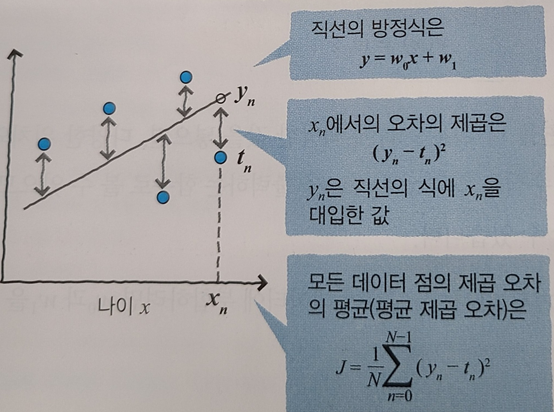

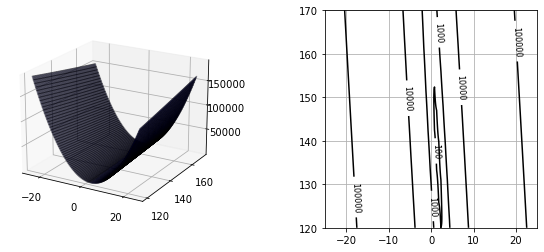

In [6]:
from mpl_toolkits.mplot3d import Axes3D
def mse_line(x, t, w):
    y=w[0]*x+w[1] #예측 함수
    mse=np.mean((y-t)**2) #(예측값(출력값)-target)**2이용
    return mse

xn=100
w0_range=[-25, 25]
w1_range=[120, 170]
x0=np.linspace(w0_range[0], w0_range[1], xn)
x1=np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1=np.meshgrid(x0, x1)
J=np.zeros((len(x0), len(x1)))
for i in range(xn):
    for j in range(xn):
        J[j, i]=mse_line(X, T, (x0[i], x1[j]))

plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax=plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0,xx1, J, rstride=1, cstride=1, alpha=0.3,
                color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)


plt.subplot(1, 2, 2)
cont= plt.contour(xx0, xx1, J, 30, colors='black',
                 levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)


등고선이 100 인 부분이 최소 부분이다.

### 학습하는 방법

1. 적당한 위치의 $w_0$과 $w_1$을 결정한다. 
2. 그 점에서의 기울기를 확인하고, J가 작아지는 방향으로 $w_0$과 $w_1$을 진행
3. J가 가장 작아지는 그릇의 바닥에 도달할 때 까지, 반복

알고리즘의 이름: gradient dwescent
<br>함수의 크기와 기울기를 가지고 있는 벡터가 gradient이다.
<br>gradient는 항상 크기가 커지는 방향을 가리키고 있기 때문데
<br>gradient가 가리키는 방향의 반대로 내려야 최소점을 찾을 수 있다.

왜? 함수의 최소값을 바로 안구할까?
우리는 보통 함수의 최솟값을 찾고자 할 때, 미분계수를 구함으로써 찾곤 한다.(컴퓨터를 사용하는 것이 아닌 그냥 수학 문제를 풀 때). 컴퓨터에서 해당 방법을 사용하지 않는 이유는 다음과 같다.
<br>실제 분석에서(특히, 딥러닝 알고리즘을 활용하는 경우) 보게 되는 함수들은 형태가 굉장히 복잡해서 
<br>미분계수와 그 근을 계산하기 어려운 경우가 많음
<br>미분계수 계산 과정을 컴퓨터로 구현하는 것보다, 경사하강법을 구현하는 것이 훨씬 쉬움
<br>데이터의 양이 매우 큰 경우 경사하강법과 같은 순차적인 방법이 계산량 측면에서 훨씬 효율적

오차 함수가 낮춰지는 쪽으로 발달이 된 이유: (계단 함수 일 때 제외하고) 
<br>오차함수는 미분이 가능하며 오차의 미분값이 가리키는 방향의 반대방향 파라미터를 개선하하면 된다.
<br>정확도를 올리려는 방향으로 발달이 안되는 이유: 정확도는 불연속 함수이다.
<br>정확도를 개선할 수 없다. 정확도의 미분 값은 0인 부분이 많기 때문에
<br>매개변수를 탐색할 방법이 없다.

목적 함수의 값: $$J(x_0, x_1)=\frac{1}{N}\cdot \sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)^2$$

N번 째 함수에서 N번째 점을 빼서 제곱을 취한다음 모두 합치고 데이터의 개수만큼 나눠서 평균을 구한다.

연쇄 법칙과 편미분을 이용하여 $w_0$, $w_1$의 gradient를 구한다.
1. 먼제 제곱으로 되어있는 식을 미분한다.
2. 제곱안에 있는 식을 각각 $w_0$, $w_1$에 대해 편미분을 한다.

$w_0$와 $w_1$이 가리키는 방향의 반대 방향을 찾아서 $w_0$과 $w_1$의 최적해(목적함수의 최솟값)을
<br>구하면 된다.

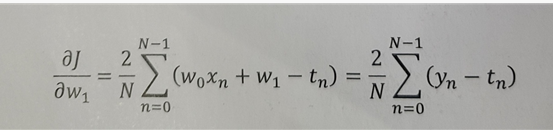

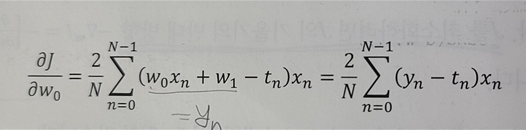

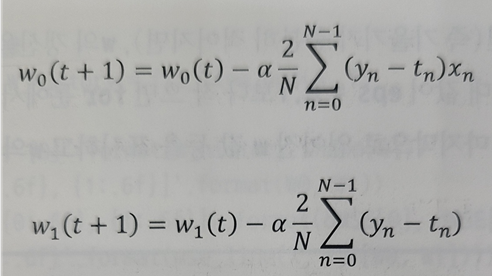

이식의 의미: 다음에 매개 변수가 이동할 공간=기존 매개변수의 위치-학습률$*$기존 매개변수 위치의 gradient값

학습률이 정의되는 이유: 학습률을 너무 크게 선택하면 탐색이 너무 불안정하여 탐색 공간을 탐색하지 못하게 된다. 
<br>학습률이 너무 작으면 학습이 너무 느려서 안된다.

In [7]:
def dmse_line(x, t, w): #기울기를 계산하는 함수를 정의
    y=w[0]*x+w[1]
    d_w0=2*np.mean((y-t)*x)
    d_w1=2*np.mean(y-t)
    return d_w0, d_w1 #w_0과 w_1의 미분 값이 각각 나옵니다.

In [8]:
d_w=dmse_line(X, T, [10, 165]) #w_0이 10, w_1이 165일 때 순간 기울기를 구하기
print(np.round(d_w,1))

[5046.3  301.8]


반복횟수13820:
W=[1.539947, 136.176160]
dMSE=[-0.0057940.099991]
MSE=49.027452


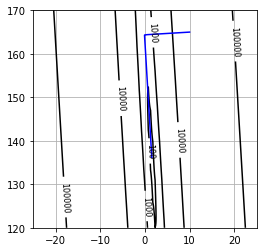

In [9]:
def fit_line_num(x,t):
    w_init=[10, 165]
    alpha=0.001 #학습률
    i_max=100000 
    eps=0.1 #학습 종료의 기준점
    w_i=np.zeros([i_max, 2]) #100000*100000개의 배열로 존재
    w_i[0,: ]=w_init #가중치 w_0과 w_1을 초기화한 값인 10과 165를 저장
    for i in range(1, i_max): #i를 진행해가며 매개변수 공간을 탐사
        dmse=dmse_line(x,t, w_i[i-1]) #dmse[0]은 dw_0이 나오며 dmse[1]은 dw_1이 나옵니다.
        w_i[i, 0]=w_i[i-1, 0]-alpha*dmse[0] #w_0과 w_1에 대해 각각 gradient descent를 수행
        w_i[i, 1]=w_i[i-1, 1]-alpha*dmse[1] #gradient descent를 하면서 w_i에 있는 값들을 저장
        if max(np.absolute(dmse))< eps: #미분 값이 eps보다 낮은 경우 반복을 정지
            break
    w0=w_i[i, 0]
    w1=w_i[i, 1]
    w_i=w_i[:i,:]
    return w0, w1, dmse, w_i

plt.figure(figsize=(4, 4))
xn=100
w0_range=[-25, 25]
w1_range=[120, 170]
x0=np.linspace(w0_range[0], w0_range[1], xn)
x1=np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1=np.meshgrid(x0, x1)
for i in range(xn):
    for j in range(xn):
        J[j, i]=mse_line(X, T, (x0[i], x1[j]))
cont= plt.contour(xx0, xx1, J, 30, colors='black',
                 levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

plt.grid(True)
W0, W1, dMSE, W_history=fit_line_num(X, T)
print('반복횟수{0}:'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}{1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:,1],'-',color='blue', markersize=10, markeredgecolor='cornflowerblue')
plt.show()








w0=1.540, w1=136.176
SD=7.002cm


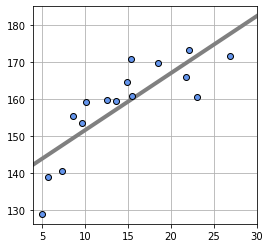

In [10]:
def show_line(w):
    xb=np.linspace(X_min,X_max, 100)
    y=w[0]*xb+w[1]
    plt.plot(xb, y, color=(.5, .5, .5),linewidth=4)
plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse=mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
print("SD={0:.3f}cm".format(np.sqrt(mse))) #{a:.bf}.format()의 의미는 a번째 인수의 소수점 b의 자리 수까지 출력을 의미한다.
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
        color='cornflowerblue', markeredgecolor='black') #키와 나이를 점으로 표시 이떄 linestyle은 'None'으로 설정
plt.xlim(X_min, X_max)
plt.grid(True)


오차함수의 미분 값이 0.1보다 작을때 나오는 w_0과 w_1을 바탕으로 직선을 그었다.
<br>이 때, MSE는 $49.074^2cm$가 나오는데 루트를 취하면 7cm가 나온다.

오차가 정규분포(가우스 분포-종모양의 분포)를 따른다고 가정하였을 때, 전체의 데이터중
<br>68%의 데이터와 선과의 오차가 7cm이하라는 것을 의미한다.

이렇게 푀소 제곱 법으로 극소 값을 구할 수 있다.
<br>그러나 어디까지나 극소값이지 전체의 극소값이라는 보장이 없다.
<br>J가 복잡한 형태의 함수이면 가장 깊은 최소 값을 구하기 힘들다.
(local minimum에 빠질 수 있다.)
<br>이에 따른 방법: 다양한 초기값을 설정하여 경사하강법을 여러번 하여,
<br>그중 J가 가장 작아진 시점으로 채용하는 근사적인 방법도 있다.

이 문제에서는 J의 오목함이 1번 밖에 없는 2차 다항식이므로,
<br>학습률을 적절하게 선택하면 언제나 최솟 값으로 간다.

### 해석해로 구해보기

여기서 언급된 Gradient Descent는 수치해다.
<br>수치해란 반복 계산을 통해서 얻어지는 근사적인 해이다. 
<br>이와 반대로 방정식을 해결하여 문제를 푸는 경우가 있는데 
이를 해석해라고 부른다.


여기서 해석해는 수치 해석학에서 나왔다. 수치 해석학이란? 방정식을 풀어서 주어진 오차를 최소화하는 변수를 찾는 학문이다.

해석해를 구하면 좋은점: 오차함수가 최소인 부분을 바로 알아 낼 수 있다.
<br>단점: 딥러닝에서는 쓰기 힘들다. 데이터간의 상관관계가 복잡하기 때문이다.

$$J(x_0, x_1)=\frac{1}{N}\cdot \sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)^2$$

$$\frac{dJ}{dw_0}=\frac{2}{N} \sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)x_n=0 $$

$$ \frac{dJ}{dw_1}=\frac{2}{N} \sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)=0 $$

$$ \frac{dJ}{dw_0}에 대해서만 정리  $$

2를 나눈뒤, 각항을 나누고 n과 상관없는 항을 앞으로 뺀다.
$$ w_0\frac{1}{N}\sum_{n=0}^{N-2}x_n^2+w_1\frac{1}{N}\sum_{n=0}^{N-2}x_n-\frac{1}{N}\sum_{n=0}^{N-2}t_nx_n=0    $$

$$<x^2>= \frac{1}{N}\sum_{n=0}^{N-2}x_n^2은\ 입력 데이터\ x에대한\ 제곱\ x^2의\ 평균이다.(다 합치고 나눈 것이기 때문) $$

$$<x>=\frac{1}{N}\sum_{n=0}^{N-2}x_n은\ 입력데이터\ x에대한 \ 평균이다. $$

$$<tx>= \frac{1}{N}\sum_{n=0}^{N-2}t_nx_n은\ 입력데이터 \ x와\ x의\ 정답\ 값인\ t의\ 곱의\ 평균이다. $$

여기서 $t_n$이란 입력 x에 대한 점으로 알 수 있다.

$$ w_0<x^2>+w_1<x>-<tx>=0 $$으로 간단하게 정리할 수 있다.

$\frac{dJ}{dw_1}$에 대해 정리하면 $$w_0<x>+w_1-<t>=0 $$

여기서 $<t>$는 x의 정답인 target의 평균이다. 

위 식을 $w_0$,$w_1$에 대하여 정리한다.

$$ w_0=\frac{<tx>-w_1<x>}{<x^2>}   $$


<br>$$ w_1=<t>-w_0<x>  $$

결론) 연립방정식을 풀면
$$ w_0=\frac{<tx>-<t><x>}{<x^2>-<x>^2}       $$

$$ w_1=<t>-\frac{<tx>-<t><x>}{<x^2>-<x>^2}<x>   $$

In [11]:
#해석해를 구현하기
def fit_line(x, t):
    mx=np.mean(x) #<x>
    mt=np.mean(t) #<t>
    mtx=np.mean(t*x) #<tx>
    mxx=np.mean(x**2)#x^2
    w0=(mtx-mt*mx)/(mxx-mx**2)
    w1=mt-w0*mx
    return np.array([w0, w1])
    


w_0=1.558, w_1=135.872
SD=7.001 cm


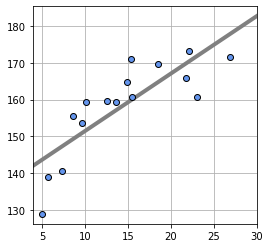

In [12]:
W=fit_line(X, T)
print("w_0={0:.3f}, w_1={1:.3f}".format(W[0],W[1]))
mse=mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

해석해로 구한 w_0과 w_1은 각각 1.558과 135.872였다. 
<br>거리는 7cm만큼의 차이가 존재하였다.

# 2차원입력모델

나이, 키뿐만 아니라 몸무게라는 변수도 넣기

데이터가 2차원 [나이, 몸무게]이기 때문에 3차원의 그래프를 그려야 한다.

1. 인공의 데이터를 만들기
$$ 몸무게=23*키^2/100+노이즈  $$로 몸무게라는 변수를 설정, $x_0$은 나이로$x_1$이란 몸무게 데이터를 형성한다.
그리고 t는 키이다.


<br>여기서 몸무게는 키의 제곱에 비례하는데 기계가 학습으로 이 관계를 어느정도 파악해야 한다. 

In [13]:
#데이터 생성
X0=X#키
X0_min=5 #최소 나이
X0_max=30 #최대 나이
np.random.seed(seed=1)
X1=23*(T/100)**2+2*np.random.randn(X_n)
X1_mean=49 #최소 몸무게
X1_max=75
print(np.round(X0,2)) #나이
print(np.round(X1,2)) #몸무게
print(np.round(T,2))  #키

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


In [14]:
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i],x1[i]],
               [120, t[i]], color='gray') #범위 설정, 점의 위치를 표시할 시작점, 끝점 설정 키는 120cm부터 적용
    ax.plot(x0, x1, t, 'o', color='cornflowerblue', markeredgecolor='black',
       markersize=6, markeredgewidth=0.5)
    ax.view_init(elev=35, azim=75)

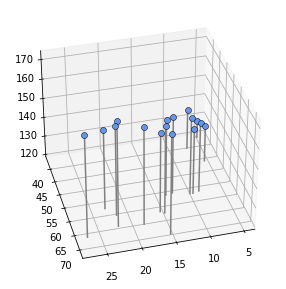

In [15]:
plt.figure(figsize=(6, 5))
ax=plt.subplot(1, 1,1, projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

여기서 데이터는 2차원 [나이, 몸무게]이기 때문에 이걸 정확히 예측할 면이 필요하다.
<br>나이와 몸무게에 따른 키를 학습한 다음, 새로운 데이터(나이 키)가 들어왔을 때 키를 예측하는 모델을 생성
<br>y=w_0x+w_1x_1+w_2라는 식을 형성할 것이다.(모델은 몸무게와 나이 사이에 비례관계를 내포해야 한다.)

입력 나이, 몸무게 출력t=키

In [16]:
def show_plane(ax, w):
    px0=np.linspace(X0_min, X0_max, 5) #나이
    px1=np.linspace(X0_min, X0_max, 5) #몸무게
    px0, px1=np.meshgrid(px0, px1)
    y=w[0]*px0+w[1]*px1+w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')

In [17]:
def mse_plane(x0, x1, t, w):#오차를 구하는 함수
    y=w[0]*x0+w[1]*x1+w[2]
    mse=np.mean((y-t)**2)
    return mse

SD=12.876 cm


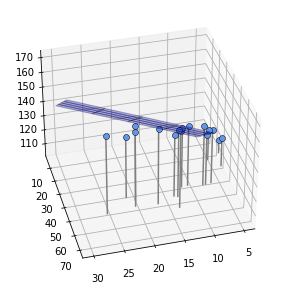

In [18]:
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W) 
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


x_0과 x_1의 조합으로 y를 형성한다. 이때 x_0과 x_1을 무수히 매핑하면 면이 형성된다.

### 데이터 표기 법 알고가기

n차원을 가진 m개의 데이터가 있다고 가정하면
$$A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$$라고 표현

$$A_{n} =
 \begin{pmatrix}
   a_{1,n} \\
  a_{2,n} \\
   \vdots  \\
   a_{m,n}
 \end{pmatrix}$$

이 식은 데이터의 n차원을 다룰 때 이런식으로 표현한다.

### 매개변수의 해석해

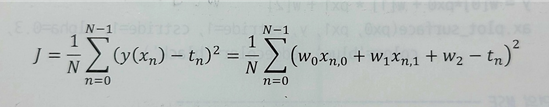

목적함수를 정의한다. $(우리가\ 정의한\ 모델에\ 데이터를\ 넣은\ 값-예측해야할\ target값)^2$

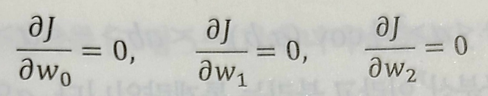

매개변수에 대해 목적함수를 최소화할 수 있는 w_0, w_1, w_2를 구하기

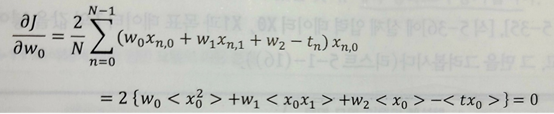

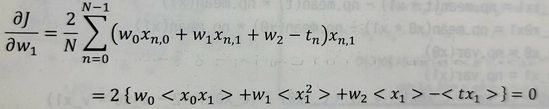

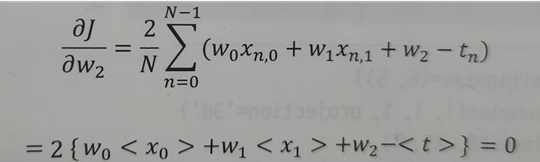

식을 전개

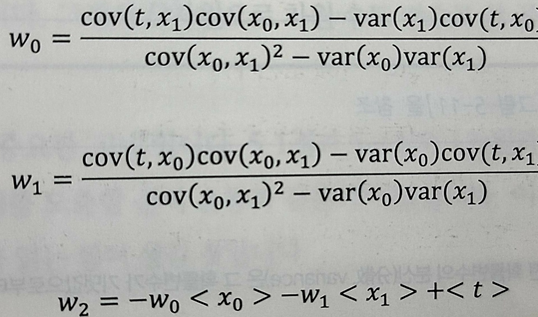

w_0, w_1, w_2를 구하기

var은 분산으로 데이터에 제곱을 하여 평균을 한 값에서 데이터 평균의 제곱을 뺀 값이다. 분산이 크면 클 수록 값들이 골고루 멀리 퍼져있다.
가우스 분포에서 분산이 크면 넓은 종 모양을 보여준다.

<br>cov는 공분산을 의미한다. a와 b가 얼마나 서로 영향을 끼치는지 나타낸다. ab의 평균-a평균\*b평균이다.

공분산(共分散, 영어: covariance)은 2개의 확률변수의 선형 관계를 나타내는 값이다. 만약 2개의 변수중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 선형 상관성이 있다면 양수의 공분산을 가진다. 반대로 2개의 변수중 하나의 값이 상승하는 경향을 보일 때 다른 값이 하강하는 선형 상관성을 보인다면 공분산의 값은 음수가 된다. 

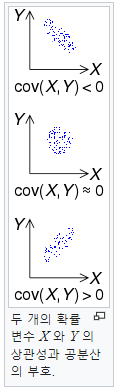

### 구현해보기

w0=0.5, w1=1.1, w2=89.0
SD=2.546 cm


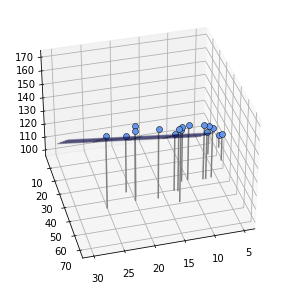

In [19]:
def fit_plane(x0, x1, t):
    c_tx0=np.mean(t*x0)-np.mean(t)*np.mean(x0)
    c_tx1=np.mean(t*x1)-np.mean(t)*np.mean(x1)
    c_x0x1=np.mean(x0*x1)-np.mean(x0)*np.mean(x1)
    v_x0=np.var(x0) #분산을 이용할 때 np.var()이용
    v_x1=np.var(x1)
    w0=(c_tx1*c_x0x1-v_x1*c_tx0)/(c_x0x1**2-v_x0*v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2]) 

plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse))) #7cm에서 2.5cm로 거리가 감소하였다.
plt.show()

# D차원 입력 모델의 경우

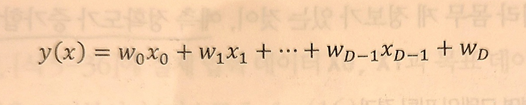

이때 D항의 경우 x가 아닌 1이 곱해져 있다. 이 항이 필요한 이유는 x=0을 넣었을 때 $w_D$가 없으면 무조건 원점을 지나는 평면이 되기 때문이다.

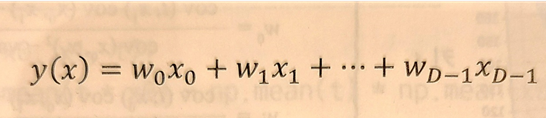

x가 붙어 있는 항만 고려

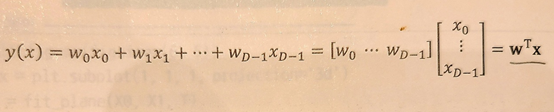

<br>위 식에서는 둘이 곱을 하기 때문에 연산을 하기 위해 w를 가로로 변형하였다.
<br>w를 가로로 표현해서 $w^t$로 표현(전치행렬).

목적함수

$$J(w)=\frac{1}{N}\sum_{n=0}^{N-1}(y(x_n)-t_n)^2$$

이걸 최소화할 다차원의 해를 구하기

$$ J'(w)=\frac{2}{N}\sum_{n=0}^{N-1}(y(x_n)-t_n)=\frac{2}{N}\sum_{n=0}^{N-1}(w^t\cdot x_n-t_n)x_{n,i} $$

이때 n은 n번째 데이터를 의미하고 i는 차원을 의미한다. (W가 D차원만큼 존재하면 상수항w_d와의 내적은 제외해야 하기 때문에 
i는 D-1까지 존재한다.)

매개변수와 데이터끼리 내적한 값(선형회귀라서 단순 w\*x로 표현이 된다.)-target의 값

D차일 경우에 최소의 해를 구하기(D는 상수항이라서 제외한다.)

$$\frac{1}{N}\sum_{n=0}^{N-1}(w^T\cdot x_n-t_n)x_{n,i} $$

$$\sum_{n=0}^{N-1}(w^T\cdot x_n-t_n)x_{n,i} $$

일단 해석해를 구하기 위해서 모든 차원 i에 대해서 위의 방정식이 성립해야한다.

$$\sum_{n=0}^{N-1}(w^T\cdot x_n-t_n)x_{n,1}=0 \   (1차원)$$

$$\sum_{n=0}^{N-1}(w^T\cdot x_n-t_n)x_{n,2}=0 \ (2차원)         $$

$$ \cdots  $$

$$ \sum_{n=0}^{N-1}(w^T\cdot x_n-t_n)x_{n,D-1}=0 \  (D-1차원) $$

이걸 방정식으로 표현

$$    \sum_{n=0}^{N-1}(W^Tx_n-t_n)[x_{n,0}, x_{n,1}, x_{n,2} \cdots x_n{n, d-1}] =[0\ 0\ 0\ 0\cdots 0]        $$

여기서 중요한 점:
$$x_{n} =
 \begin{pmatrix}
   x_{1,n} \\
  x_{2,n} \\
   \vdots  \\
   x_{D-1,n}
 \end{pmatrix}$$

$x_n$이란 $x_{1,n}$부터 $x_{D-1,n}$까지 D-1개의 원소를 가진 세로 벡터이다.

$x_n$벡터를 세로로 표현하였는데 이 벡터의 행요소와 열요소가 뒤바뀌면서 가로 벡터가 되었기 때문에 $x_n^T$라고 표기해야한다.

$$\sum_{n=0}^{N-1}(W^Tx_n-t_n)x^T_n =[0\ 0\ 0\ 0\cdots 0] $$ 으로 식을 간추릴 수 있다.

$$ \sum_{n=0}^{N-1}(W^Tx_nx^T_n)-\sum_{n=0}^{N-1}(t_nx^T_n)=0 $$

$$ \sum_{n=0}^{N-1}x_n=X $$라고 표현

X란? 데이터의 개수 N과 차원(D-1)을 모두 포함한 벡터이다.

왜? x_n은 1부터 D-1까지 가진 벡터이며 이러한 0부터 D-1까지 가진 벡터가 0부터 N-1까지 총 N개 존재하기 때문이다. 

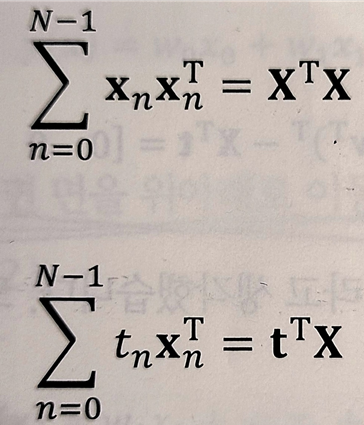

이런 식으로 식을 변환이 가능하다.

왜 변환 했을까? 뺄셈을 할 때 $w^t\sum x_nx_n^T$와$\sum t_nx_n^T$의 형태를 맞춰주기 위함이다.

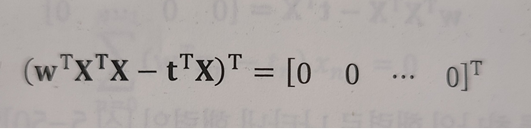

W에 대한 식으로 바꾸기 위해 $W^T$를 W로 바꾸기

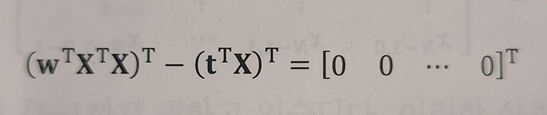

단순 덧셈과 뺄셈은 전치행렬을 할 때, 순서가 바뀌지 않는다.

$$(A^T+B^T)^T=A+B$$

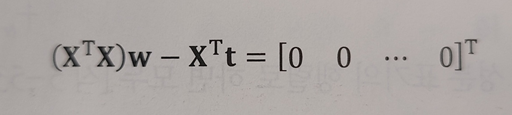

대신 원소끼리 곱해진 경우 전치행렬을 하면 순서가 바뀐다.$$ (AB)^T=B^TA^T$$\

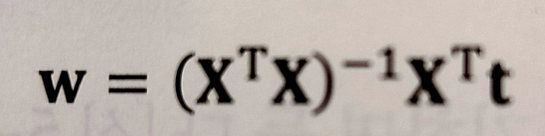

이식의 결론이다. 다변수의 해석해를 구할 때 사용되는 궁극적인 방정식이다. 

# 선형 기저함수모델

개요) 다시 차원 데이터로 돌아가 나이에 따른 키를 예측하려고 하는데
<br>이번에는 선형적인 요소가 아닌 비선형 요소도 투입하여 계산 하려고 한다. 

### 비선형 함수를 이용하여 오차를 감소

기저함수란? 함수를 설명하는데 바탕이 되는 함수 ϕ(x)로 표현 phi라고 읽는다.
<br>모든 벡터 공간의 함수들을 기저 벡터의 선형결합으로 표시할 수 있듯이 모든 연속함수들은 기저 함수들의 선형결합으로 표시할 수 있다.
<br>독립변수 벡터 x를 입력으로 가지는 여러개의 비선형 함수 ϕj(x)들을 생각해 내어 원래의 입력 변수 x대신 ϕ(x)들을 입력변수로 사용한 다음과 같은 모형을 쓰면 더 좋은 예측 성능을 가질 수도 있다. 비선형적인 데이터 예측을 위해 비선형적인 함수(곡선함수)들의 선형적인 (단순 곱셈과 덧셈)으로 모델을 나타내려고 한다.

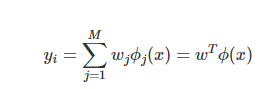

비선형함수와 매개변수끼리 곱하고 j항을 모두 더하기 때문에 선형적인 결합이 된다.

가우스 함수를 이용하여 선형 기저함수 모델을 생성(가우스 모델들의 선형적인 조합으로 모델의 양상을 예측)

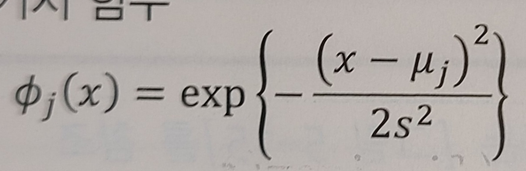

위 가우스 함수들의 조합으로 주어진 데이터를 해석하는 매개변수를 찾기

In [20]:
import numpy as np
import matplotlib.pyplot as plt

outfile=np.load('ch5_data.npz')
X=outfile['X']
X_min=outfile['X_min']
X_max=outfile['X_max']
X_outfile=outfile['X_n']
T=outfile['T']

In [21]:
def gauss(x, mu, s):
    return np.exp(-(x-mu)**2/(2*s**2))

mu가 가우스 함수의 중심을 결정한다. s는 함수의 확장 정도로 조절된다. 

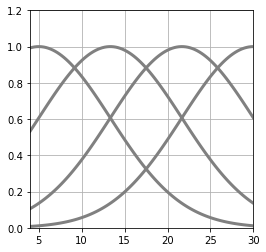

In [22]:
M=4
plt.figure(figsize=(4, 4))
mu=np.linspace(5, 30, M) #5부터 30까지 4씩 증가
s=mu[1]-mu[0] 
xb=np.linspace(X_min, X_max, 100)
for j in range(M):
    y=gauss(xb,mu[j],s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()
#여러가지 mu가 다양한 가우스 함수를 표현하였다.

M=4라는 뜻은 매개변수가 4개를 뜻하며 $w_0ϕ(x_0)+w_1ϕ(x_1)+w_2ϕ(x_2)+w_3ϕ(x_3)+w_4$ 's'는 가우스 사이거리를 표현한다.
<br>s의 크기에 따라 결정이 된다.

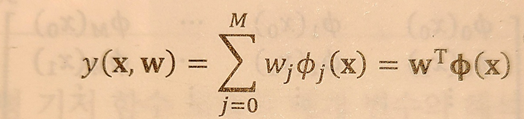

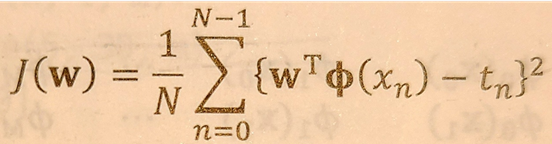

목적함수는 이렇게 표현이 된다. $(표본이\ 가우스함수(기저함수)를\ 통과한\ 값*매개변수의\ 값-target값)^2$

### 직접 구현해보기

In [23]:
# 선형 기저 함수 모델 ----------------
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

In [24]:
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse


In [25]:
# 선형 기저 함수 모델 정확한 솔루션 -----------------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m) #5부터 30까지 4개의 인자가 존재[ 5, 13.3, 21.6, 30] mu의 평균에 따른 최적화된w_j를 찾기
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))#16*5의 1로 된 행렬을 생성 16개의 데이터와 w_0 w_1 w_2 w_3 w_4안 5개의 가우스 모델개수로 생성(상수항까지 고려)
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)# ϕ(x)를 구하는 과정이다. 마지막열은 상수항이라 1로 초기화를 하고 값을 바꾸지 않았다.
    psi_T = np.transpose(psi)         # psi의 0열은 mu가 5인 경우 연산해본 값 1열은 13.3 2열은 21.6, 3열은 30으로 계산 했을때 값들이 나옴
                                      #행은 데이터가 들어간다. 1번째 데이터, 2번째 데이터 3번째 데이터등등
    
    b = np.linalg.inv(psi_T.dot(psi)) #(ϕ^Tϕ)^-1를 구현
    c = b.dot(psi_T) #b에다가 전치행렬 곱하여 구현
    w = c.dot(t) #여기에 t를 곱한다.
    return w

요약 m\*n개의 기저함수 모델이 존재 행은 데이터의 개수이고 열은 mu에 따라 달라지는 입력에 대한 가우스함수의 출력값이 나온다. 
<br>0열은 mu가 4일때 출력값, 1열은 mu가 13.3 2열은 mu가 21.6, 3열은 mu가 30일때 출력값이 나오며,
<br>4열은 상수항 부분이기때문에 무조건 1과 곱해 자기 자신이 나온다.
<br>이런 전처리한 계획행렬을 이용하여 어떠한 연산을 통해 J의 오차가 최소화가 되는 매개변수
w_0, w_1, w_2, w_3, w_4를 구할 수 있다.

$$w=(ϕ^Tϕ)^{-1}ϕ^Tt$$라는 해석해를 구하는 공식을 이용햐여 최적화된 매개변수를 구하기

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


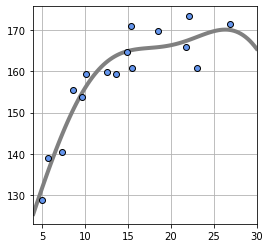

In [26]:
# 가우스 기저 함수 표시 -----------------------
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], linewidth=4) 
#이때 C는 색깔을 결정한다.

# 메인 ----------------------------------
plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+ str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

fit_gauss_func으로 해석해를 구하고 show_gauss_func으로 그래프를 그리는 모습이다.

# 오버피팅의 문제

M이 크면 클수록 모델이 점점 복잡해진다. 조절해야되는 W의 개수가 점차 증가하기 때문에 자유도가 증가한다.
<br>자유도가 복잡하면? 훈련데이터는 잘 맞추지만 너무 잘맞춰서 과적합이 발생한다.

과적합이 발생하면 안되는 이유: 머신러닝의 목적은 훈련 데이터가 생성되는 원리를 찾고, 이 원리를 이용해 시험 데이터를 맞춰야하는데, 훈련 데이터에 너무 학습이 맞춰지면, 훈련 데이터에서 벗어난 test data를 전혀 예측을 못한다.

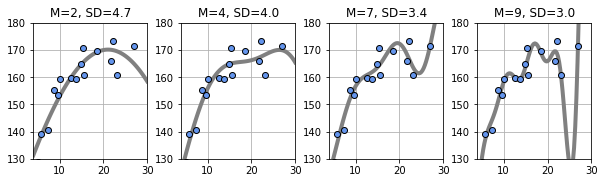

In [27]:
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace=0.3)
M=[2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)
    
    
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

모델의 복잡도가 커지면서 MSE가 감소하는 모습을 보이고 있다.
<br>해석: M=2면 2개의 복잡도를 가질 때 나오는 해석해를 이용하여 그래프를 그린 것이며,
<br>M=9인 경우에는 9개의 복잡도를 가지면서 해석해를 w_0부터 w_9까지 구한 후, 그래프를 그린 것이다.

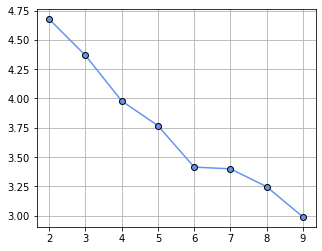

In [28]:
plt.figure(figsize=(5, 4))
M=range(2, 10)
mse2=np.zeros(len(M))
for i in range(len(M)):
    W=fit_gauss_func(X, T, M[i]) #최적해를 구하는 함수
    mse2[i]=np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker='o', color='cornflowerblue', markeredgecolor='black')
plt.grid(True)


훈련데이터에서의 MSE는 큰 지표가 될 수 없다. 궁극적으로 test_dataset를 잘 맞추는 지 모르기 때문이다.

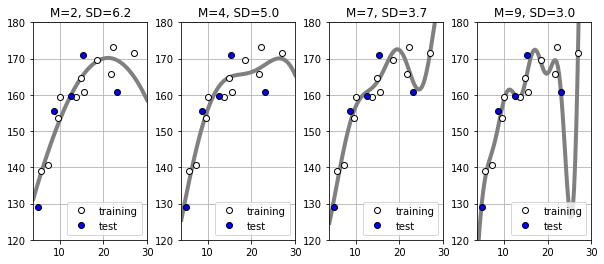

In [29]:
X_test=X[:int(X_n/4+1)] #16개중 1/3은 test 나머지는 train에 활용
T_test=T[:int(X_n/4+1)]
X_train=X[int(X_n/4+1):] 
T_train=T[int(X_n/4+1):]
plt.figure(figsize=(10, 4)) #그래프의 크기 설정

plt.subplots_adjust(wspace=0.3)

M=[2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M) ,i+1)
    W=fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o', linestyle='None', color='white',
            markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o',linestyle='None', color='blue',
            markeredgecolor='black', label='test')
    plt.legend(loc='lower right')
    plt.xlim(X_min, X_max)
    plt.ylim(120, 180)
    plt.grid(True)
    mse=mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()


2부터 9까지 이동하면서 하나씩 관찰

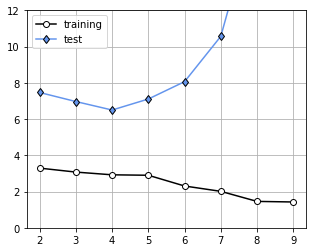

In [30]:
plt.figure(figsize=(5, 4))
M=range(2, 10)
mse_train=np.zeros(len(M))
mse_test=np.zeros(len(M))
for i in range(len(M)):
    W=fit_gauss_func(X_train, T_train, M[i])
    mse_train[i]=np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i]=np.sqrt(mse_gauss_func(X_test, T_test, W))

plt.plot(M, mse_train, marker='o', linestyle='-', markerfacecolor='white',markeredgecolor='black',
        color='black', label='training')
plt.plot(M, mse_test, marker='d', linestyle='-', markeredgecolor='black',
        color='cornflowerblue', label='test')
plt.grid(True)
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.show()

훈련데이터의 오차는 평이하게 감소하지만, 테스트데이터는 M=4이후에 증가하는 추세를 보였다.
(M=5부터 오버피팅이 일어나는 것을 알 수 있다.)

데이터의 수가 적은 경우 오버피팅이 두드러지게 나타난다.

교차 검증을 통해 차이를 줄이려고 한다.

### 교차검증 사용

5개로 fold를 나눈 다음 
<br>처음에는 1fold평가 2번째는 2fold 평가 이런식으로 5fold까지 진행

적당한 M을 선택하는 것은 하이퍼 파라미터중 하나이다.
<br>하이퍼 파라미터를 고르는 제일 좋은 방법은
<br>학습을 한다음, 검증을 하여 검증된 파라미터중에 제일 MSE가 낮은 M을 선택하면 된다.


In [45]:
def kfold_gauss_func(x, t, m, k):
    n=x.shape[0]
    mse_train=np.zeros(k)
    mse_test=np.zeros(k)
    
    for i in range(0, k):
        x_train=x[np.fmod(range(n), k)!=i]
        t_train=t[np.fmod(range(n), k)!=i]
        x_test=x[np.fmod(range(n), k)==i]
        t_test=t[np.fmod(range(n), k)==i]
        wm=fit_gauss_func(x_train, t_train, m)
        mse_train[i]=mse_gauss_func(x_train, t_train, wm)
        mse_test[i]=mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

In [46]:
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32)

In [47]:
a=np.arange(1, 11)
b=[np.fmod(a,5)!=0]
print(b)

[array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False])]


np.fmod(range(10),5)는 0부터 9까지 10개의 수를 5로 나눈 값을 리스트로 내보낸다.

[np.fmod(range(a),5)!=0] 
<br>0부터 a-1까지 쭉 이어져 있는 숫자 집합에서 5를 나눠서 나머지가 0이 아닌지 판단하여
boolean형태로 나온다. (True, Flase의 형태로 나온다.) 
<br> 0 1 2 3 4 5 6 7 8 9 10 에서 5와 10 그리고 0은 나머지가 0이라서 False로 나온다.
나머지는 나머지가 0이 안되기 때문에 True로 나온다.

여기서 a[boolean]의 의미는 boolean 슬라이싱을 의미하는데 a의 원소에서 True인 것만 내보낸다고 생각하면 된다.

In [48]:
np.fmod(10,5)

0

x_train=x[np.fmod(range(n), k)!=i]

<br>i=0이면? k로 나눴을 때 나머지가 0이 아닌 것들을 train 나머지가 0인 것들을 test로 본다.
<br>i=1이면? k로 나눴을 때 나머지가 1이 아닌 것들을 train 나머지가 0인 것들을 test로 본다.
<br>흥미로운 점은 for i in range(0, k)에서 반복문이 k-1까지 돌기 때문에 번갈아가면서 folkd를 돌릴 수 있다. 왜냐하면 k로 나눴을 때, 나머지는 0부터 k-1이기 때문이다.

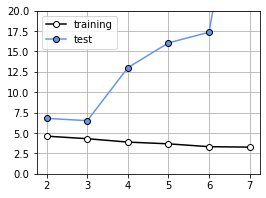

In [49]:
M=range(2, 8)
k=16
Cv_gauss_train=np.zeros((k, len(M)))
Cv_gauss_test=np.zeros((k, len(M)))
for i in range(0, len(M)):
    Cv_gauss_train[:,i], Cv_gauss_test[:,i]=kfold_gauss_func(X, T, M[i], k)

mean_gauss_train=np.sqrt(np.mean(Cv_gauss_train, axis=0))
mean_gauss_test=np.sqrt(np.mean(Cv_gauss_test, axis=0))


plt.figure(figsize=(4, 3))
plt.plot(M, mean_gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

여기서 나오는 test의 오차는 검증의 평균오차이다. 
<br>M=3일 때, test(검증)의 오차가 제일 적었다. 

SD=4.367250cm


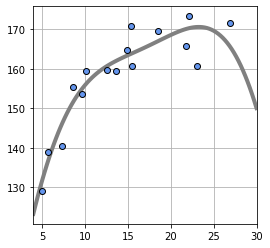

In [63]:
M=3
plt.figure(figsize=(4, 4))
W=fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse=mse_gauss_func(X, T, W)
print("SD={0:2f}cm".format(np.sqrt(mse)))
plt.show()

# 새로운 모델의 생성

그래프를 보면 이상한 현상이 존재한다. 25살 아래로 갑자기 키가 감소하는 것을 볼 수 있다.
<br>여기에 있는 사람들이 대부분 25살 이상인데 키가 갑자기 줄어 들지는 않았다. 이 문제를 해결하기 위해
새로운 모델을 생성한다.

나이가 증가할수록, 키가 점차 커지고, 결국 일정한 값으로 수렴하는 함수를 만들기

y(x)=$w_0$+$w_1$exp(-$w_2$x) $e^{-x}$의 극한은 0이므로 $w_0$에 수렴하는 양상을 보인다. 극한이란 x가 무한대로 커질 때 나오는 값을 말한다.

이번에는 경사하강법을 이용하여 수치적인 W구하기

scipy.optimize를 이용하여 최적의 매개변수를 구하기. 

In [79]:
#함수정의 하기
def model_A(x, w):
    y=w[0]-w[1]*np.exp(-w[2]*x)
    return y

def show_model_A(w):
    xb=np.linspace(X_min, X_max, 100)
    y=model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

def mse_model_A(w, x, t):
    y=model_A(x, w)
    mse=np.mean((y-t)**2)
    return mse

In [84]:
from scipy.optimize import minimize 

def fit_model_A(w_init, x, t):
    res1=minimize(mse_model_A, w_init, args=(x, t), method='powell')
    return res1.x


주의 사항: re1.x를 해야 최적화 변수의 x값이 나온다.
res1에는 다양한 인자가 있기 때문이다.
<br>
<br>   direc: array([[-1.43675213e-02,  8.94831263e-01,  1.29211634e-03],
<br>       [-1.22661891e+00,  6.07328694e+00,  1.71225134e-02],
<br>       [-1.47604110e-02,  7.44016265e-01,  1.00966957e-03]])
<br>     fun: 14.913513743254565
 <br>message: 'Optimization terminated successfully.'
  <br> nfev: 771
   <br>  nit: 18
  <br>status: 0
 <br>success: True
   <br>    x: array([169.04047102, 113.66091393,   0.21666034])

Minimization of scalar function of one or more variables using the modified Powell algorithm.
<br> Powell 알고리즘을 이용  args: 함수를 계산하는데 받는 인자 w, x, t를 받은 다음 x에 w를 넣어서 최솟값 구함

w0=169.0, w1=113.7, w2=0.2
SD=3.86cm


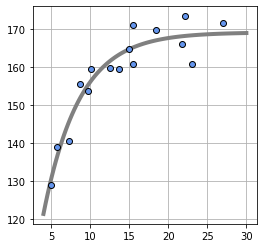

In [85]:
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W=fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim=(X_min, X_max)
plt.grid(True)
mse=mse_model_A(W, X, T)
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

# 모델간에 비교

모델A와 M=3으로 한 선형 기저함수끼리 서로 비교를 하려고 한다.

방법: 2가지 k-fold와 LOOCV를 이용하여 비교를 한다.
<br>k-fold란?
<br>전체 데이터 셋을 k개의 그룹(fold)으로 분할하여 한 그룹은 validation set, 나머지 그룹은 train set으로 사용합니다.
<br>k번 fit을 진행하여 k개의 MSE를 평균내어 최종 MSE를 계산합니다.
<br>LOOCV보다 연산량이 낮습니다.
중간 정도의 bias와 variance를 갖습니다.
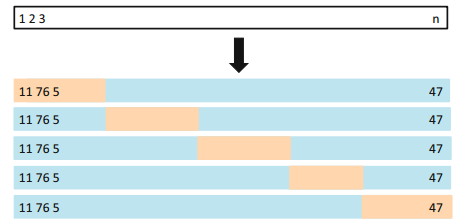

<br>LOOCV란? (Leave-One-Out Cross-Validation)
<br>단 하나의 관측값(x1, y1)만을 validation set으로 사용하고, 나머지 n-1개 관측값은 train set으로 사용합니다.
<br>n번 fitting을 진행하고, n개의 MSE를 평균하여 최종 MSE를 계산합니다.
<br>n-1개 관측값을 train에 사용하므로 bias가 낮습니다.
<br>overfitting 되어 높은 variance를 갖습니다.
<br>n번 나누고 n번 fit 하므로 랜덤성이 없습니다.
<br>n번 fit을 진행하므로 expensive 합니다.
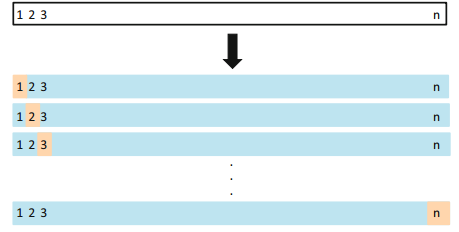

출처: https://deep-learning-study.tistory.com/623

In [109]:
def kfold_model_A(x, t, k):
    n=len(x)
    mse_train= np.zeros(k)
    mse_test=np.zeros(k)
    for i in range(0,k):
        x_train=x[np.fmod(range(n),k)!=i] #나머지가 i가 아닌 원소를 train
        t_train=t[np.fmod(range(n),k)!=i]
        x_test=x[np.fmod(range(n),k)==i]#나머지가 i인 원소들을 test한다.
        t_test=t[np.fmod(range(n),k)==i]
        wm=fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i]=mse_model_A(wm, x_train, t_train)
        mse_test[i]=mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test

Gauss(M=3) SD=6.51cm
Model A SD=4.72 cm


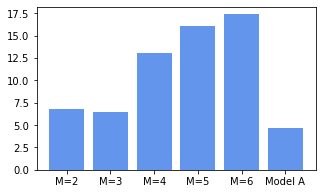

In [110]:
K=16 #16개의 데이터
Cv_A_train, Cv_A_test=kfold_model_A(X, T, K)
mean_A_test=np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f}cm".format(mean_gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD=np.append(mean_gauss_test[0:5], mean_A_test)
M=range(6)
label=["M=2", "M=3", "M=4", "M=5", "M=6", "Model A" ]
plt.figure(figsize=(5,3))
plt.bar(M, SD, tick_label=label, align="center",
facecolor="cornflowerblue")
plt.show()